# 붓꽃 의사결정트리

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from IPython.display import display
import mglearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
import graphviz
import warnings
# warnings.filterwarnings(action='ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline
plt.rc('font', family='D2coding')
%config Completer.use_jedi = False

## iris 데이터셋 로딩

In [2]:
iris = load_iris()

### iris 데이터셋 탐색

In [3]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
type(iris['data'])

numpy.ndarray

In [8]:
iris['data'].shape

(150, 4)

In [9]:
iris['data'][:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [10]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target

In [11]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [12]:
df['species'].unique()

array([0, 1, 2])

In [13]:
df['species'].value_counts()

0    50
1    50
2    50
Name: species, dtype: int64

In [14]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [15]:
# df['species'] = df['species'].apply(
#     'setosa' if df['species'] == 0 else(
#         'versicolor' if df['species'] == 1 else(
#             'virginica' if df['species'] == 2)))

### 데이터세트 훈련, 테스트로 분리

In [16]:
# from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.2, random_state=0)

In [17]:
X_train.shape, X_test.shape

((120, 4), (30, 4))

## 분류 알고리즘 : DecisionTreeClassifier
   - 분류와 회귀에 사용되는 지도학습 알고리즘
   - 데이터 특성으로부터 추론된 결정 규칙을 통해 값을 예측
   - if-then-else 결정 규칙을 통해 데이터 학습
   - 트리의 깊이가 깊을수록 복잡한 모델이 된다.
   - 결정트리의 장점
     - 이해와 해석이 쉽다.
     - 시각화가 용이하다.
     - 많은 데이터의 전처리가 필요하지 않다.
     - 수치형과 범주형 데이터 모두를 다룰 수 있다.

In [18]:
# from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=121)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=121)

## 트리 구조를 시각화하는 패키지 : graphviz

In [19]:
# import graphviz
# from sklearn.tree import export_graphviz
# export_graphviz(모델객체, 출력파일명(out_file), 결정트리클래스명칭(class_names),
#                 결정트리피쳐명칭(feature_names), 불순도표시(impurity), 색(filled))
export_graphviz(dtree, out_file='tree.dot', class_names=iris.target_names,
                feature_names=iris.feature_names, impurity=True, filled=True)

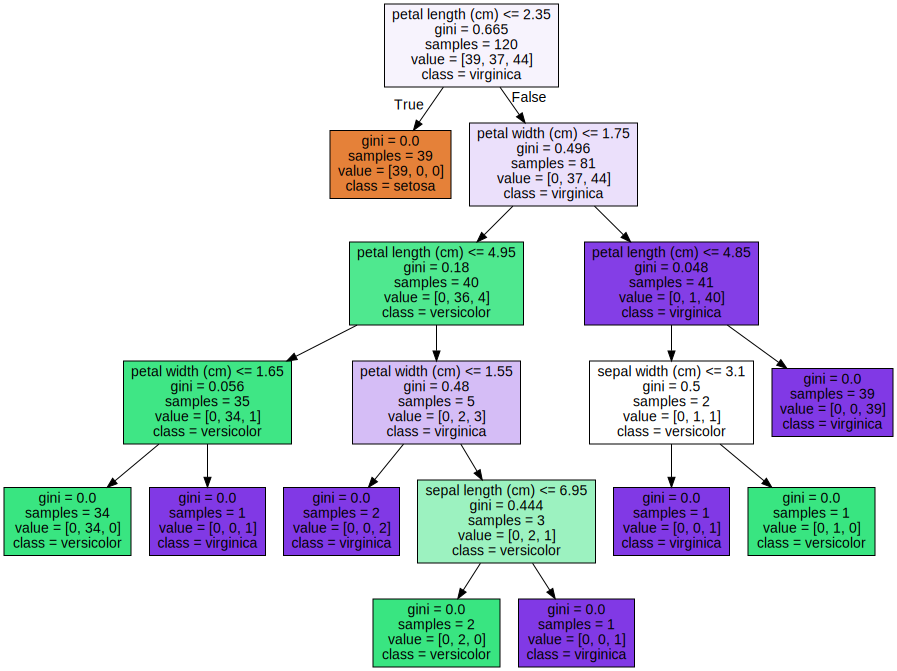

In [20]:
# open(filename, mode)
# mode : r(def), w, a
# graphviz 파이썬 래퍼 모듈을 호출해 결정트리 규칙을 시각화한다.
with open('tree.dot') as f:
    dot_graph = f.read()

src = graphviz.Source(dot_graph)
src

In [21]:
# 결정트리를 pdf 파일로 생성 : Source.gv, Source.gv.pdf 두개의 파일이 생성
# src.view()

In [22]:
print(dtree.score(X_train, y_train))
print(dtree.score(X_test, y_test))

1.0
1.0


## DecisionTree의 중요 하이퍼파라미터 튜닝

In [23]:
# from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(min_samples_split=4, random_state=121)
model.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_split=4, random_state=121)

In [24]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9833333333333333
0.9666666666666667


## feature 별 결정트리 알고리즘의 중요도

In [25]:
model.feature_importances_

array([0.        , 0.        , 0.56028618, 0.43971382])

### feature 별 중요도 값 매칭

In [26]:
for name, value in zip(iris.feature_names, model.feature_importances_):
    print('{} : {:.3f}'.format(name, value))

sepal length (cm) : 0.000
sepal width (cm) : 0.000
petal length (cm) : 0.560
petal width (cm) : 0.440


### feature 별 중요도 시각화

<AxesSubplot:>

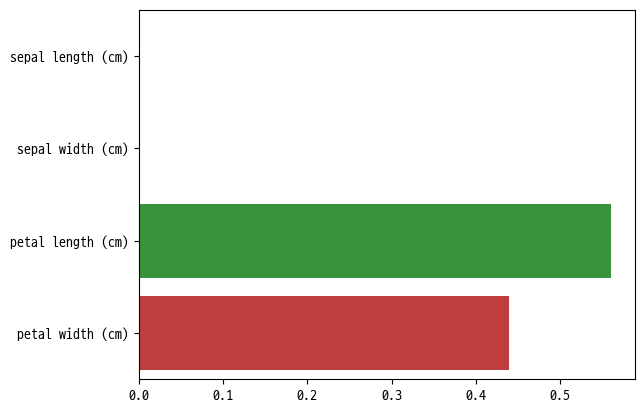

In [27]:
# import seaborn as sns
sns.barplot(model.feature_importances_, iris.feature_names)

## 가지치기(prunning)
- Tree prunning : 의사결정 트리 모델의 과적합을 줄이고, 일반화 가능성을 증대시키는 subtree를 찾는 과정
- 가지치기 방법
    - cross-validation
    - independent validation set
- Prunning Logic
    - 가치지기 과정에서는 트리 해당 데이터셋에 과도하게 최적화되지 않도록 결정트리의 최대 깊이를 제한하고,
      leaf node의 최대 개수를 제한한다.
    - 노드를 분할시키기 위해 필요한 '최소한의 데이터 개수'를 지정한다.

## 그리드 서치(Grid Search)
- 결정틜의 하이퍼파라미터 값을 바꿔가며 가장 좋은 성능이 나오는 모델을 찾는 작업
- 테스트 세트를 사용하지 않고 교차검증을 통해 좋은 모델을 선택

In [28]:
model = DecisionTreeClassifier(random_state=2022)

params = {
    'max_depth': [2, 3, 4, 5, 6, None],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9],
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]
}

gs = GridSearchCV(model, param_grid=params, cv=3, refit=True, n_jobs=-1)
gs.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=2022),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, None],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [29]:
print(gs.best_params_)

{'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [30]:
print(gs.best_score_)

0.9499999999999998


In [31]:
gs.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_depth', 'param_min_samples_leaf', 'param_min_samples_split', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [32]:
np.max(gs.cv_results_['mean_test_score'])

0.9499999999999998

In [33]:
model = DecisionTreeClassifier(max_depth=3, min_samples_leaf=1,
                               min_samples_split=2, random_state=2022)
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9666666666666667
0.9666666666666667


In [34]:
model = gs.best_estimator_
pred_y = model.predict(X_test)
accuracy_score(y_test, pred_y)

0.9666666666666667